In [89]:
#importing libraries and reading in file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint

#general sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#Pipeline
from sklearn.pipeline import make_pipeline

# Files
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
from scipy.io import arff



# Load the data and EDA

In [2]:
files = ['data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff']


df = pd.DataFrame(arff.loadarff(files[0])[0])

for f in files[1:]:
    data_temp = arff.loadarff(f)
    df_temp = pd.DataFrame(data_temp[0])
    print(df_temp.shape)
    df = df.merge(df_temp,how='outer') 

(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [4]:
print(df.shape)

df.head()

(43405, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


# Evaluate and transform to binary 0 0r 1 the target

In [5]:
df["class"].unique


<bound method Series.unique of 0        b'0'
1        b'0'
2        b'0'
3        b'0'
4        b'0'
         ... 
43400    b'1'
43401    b'1'
43402    b'1'
43403    b'1'
43404    b'1'
Name: class, Length: 43405, dtype: object>

In [6]:
df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

(array([41314.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2091.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

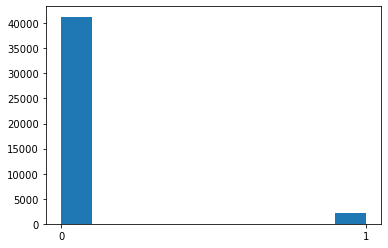

In [7]:
plt.hist(df['class'])

In [8]:
classes = []

for index, row in df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
df['class'] = df['class'].map(class_dict)

df['class'].unique()

array(['0', '1'], dtype=object)

In [9]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Explore the differents columns of the data with pandas profiling

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 242.43it/s]


In [9]:
# Variable 21, 24 missing value
# variable 27 missing value
# variable 37 missing value
# variable 44, 45 missing value
# variable 60 missing value

# Most of the variables are skew
# some has 0 but no sure what that mean

(array([3.7541e+04, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1325. ,  1798.2,  4921.4,  8044.6, 11167.8, 14291. , 17414.2,
        20537.4, 23660.6, 26783.8, 29907. ]),
 <BarContainer object of 10 artists>)

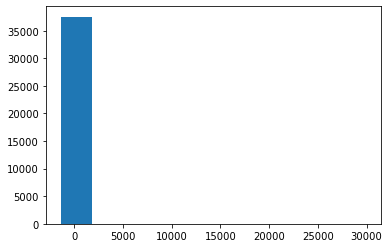

In [10]:
plt.hist(df["Attr21"])

(array([1.0000e+00, 2.0000e+00, 5.0000e+00, 4.2455e+04, 1.0000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-463.89 , -334.335, -204.78 ,  -75.225,   54.33 ,  183.885,
         313.44 ,  442.995,  572.55 ,  702.105,  831.66 ]),
 <BarContainer object of 10 artists>)

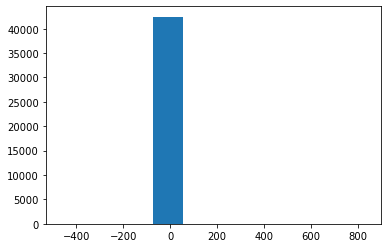

In [11]:
plt.hist(df["Attr24"])

(array([1.0000e+00, 2.0000e+00, 5.0000e+00, 4.2455e+04, 1.0000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-463.89 , -334.335, -204.78 ,  -75.225,   54.33 ,  183.885,
         313.44 ,  442.995,  572.55 ,  702.105,  831.66 ]),
 <BarContainer object of 10 artists>)

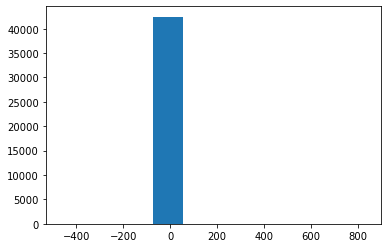

In [12]:
plt.hist(df["Attr24"])

(array([4.0597e+04, 2.9000e+01, 7.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-259010.,  187771.,  634552., 1081333., 1528114., 1974895.,
        2421676., 2868457., 3315238., 3762019., 4208800.]),
 <BarContainer object of 10 artists>)

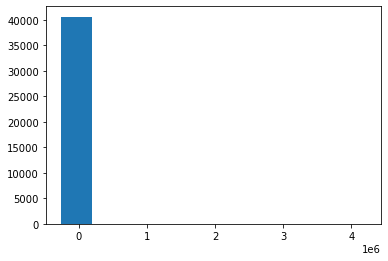

In [13]:
plt.hist(df["Attr27"])

(array([2.4411e+04, 5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -525.52 ,  39419.032,  79363.584, 119308.136, 159252.688,
        199197.24 , 239141.792, 279086.344, 319030.896, 358975.448,
        398920.   ]),
 <BarContainer object of 10 artists>)

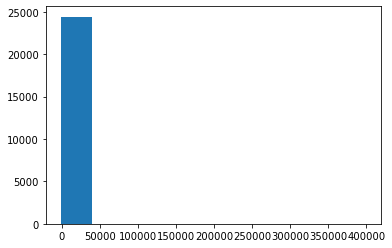

In [14]:
plt.hist(df["Attr37"])

(array([4.3276e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -115870.,  2154117.,  4424104.,  6694091.,  8964078., 11234065.,
        13504052., 15774039., 18044026., 20314013., 22584000.]),
 <BarContainer object of 10 artists>)

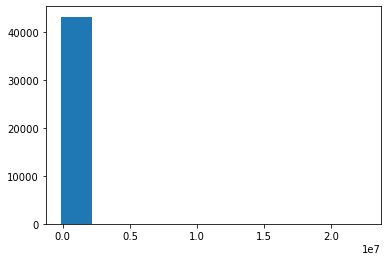

In [15]:
plt.hist(df["Attr44"])

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 4.1251e+04,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-256230., -194004., -131778.,  -69552.,   -7326.,   54900.,
         117126.,  179352.,  241578.,  303804.,  366030.]),
 <BarContainer object of 10 artists>)

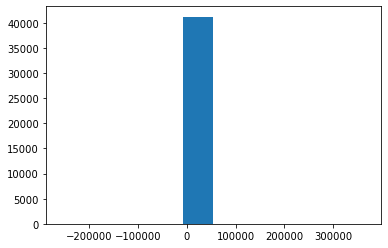

In [16]:
plt.hist(df["Attr45"])

(array([4.1247e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.24400000e+01,  4.81858804e+05,  9.63730048e+05,  1.44560129e+06,
         1.92747254e+06,  2.40934378e+06,  2.89121502e+06,  3.37308627e+06,
         3.85495751e+06,  4.33682876e+06,  4.81870000e+06]),
 <BarContainer object of 10 artists>)

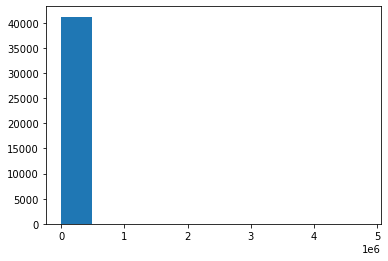

In [17]:
plt.hist(df["Attr60"])

# Randon Forest

In [19]:
# prepare test and train data

X = df.loc[:, df.columns != 'class'].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [22]:
# Normalize the data

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Set up the Grid Search for Random Forest

In [28]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


RandomizedSearchCV took 346.19 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.968 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.967 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.967 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_split': 4}

GridSearchCV took 706.87 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.969 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.968 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': N

# Evaluation of the model

In [33]:
y_hat_rf_train = grid_search.predict(X_train)
accuracy_score(y_hat_rf_train, y_train)

0.9997592930091812

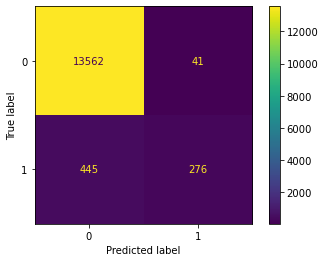

In [93]:
# Confusion matrix
confusion_matrix(y_train, y_hat_rf_train)
disp = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test)

In [73]:
y_hat_rf_test = grid_search.predict(X_test)
accuracy_score(y_hat_rf_test, y_test)

0.9660709299078469

In [84]:
# Confusion matrix
confusion_matrix(y_test, y_hat_rf_test)

array([[13562,    41],
       [  445,   276]])

In [78]:
# Precision and recall
print("Recall:", recall_score(y_test, y_hat_rf_test, pos_label="1", average='binary'))
print("Precision:", precision_score(y_test, y_hat_rf_test, pos_label="1", average='binary'))

Recall: 0.3828016643550624
Precision: 0.8706624605678234


# Plot evaluation

/Users/fabiosavorgnan/opt/anaconda3/envs/SMU/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall Curve')

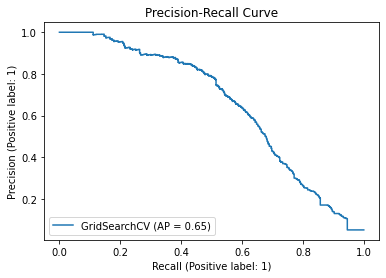

In [39]:
disp = plot_precision_recall_curve(grid_search, X_test, y_test,)
disp.ax_.set_title('Precision-Recall Curve')

# ROC

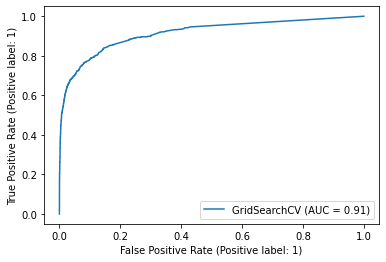

In [92]:
Disp = RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

# GBBoost model

In [40]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

# Evaluation of the model for comparison to random forest, in order to see if we can improve the Random forest best model

In [41]:
clf.score(X_train, y_train)

0.9637564045252914

In [42]:
clf.score(X_test, y_test)

0.9582518849483385

In [43]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.84156195e-02, 4.78435216e-03,
       2.57274495e-02, 2.27212096e-03, 1.65411222e-03, 0.00000000e+00,
       1.01930286e-03, 0.00000000e+00, 9.17965287e-03, 0.00000000e+00,
       3.14621773e-03, 0.00000000e+00, 5.26143572e-03, 6.23736618e-02,
       2.96485719e-03, 1.20521889e-03, 0.00000000e+00, 6.20560999e-04,
       1.44226272e-02, 9.27964921e-03, 0.00000000e+00, 4.82033144e-03,
       1.72177478e-03, 1.37120237e-03, 6.63098492e-01, 1.25567825e-03,
       1.03086207e-02, 0.00000000e+00, 1.46111002e-03, 0.00000000e+00,
       0.00000000e+00, 2.97938037e-03, 1.37090308e-02, 3.01316685e-03,
       9.10684478e-04, 4.03131369e-03, 6.78896370e-03, 0.00000000e+00,
       2.51383489e-02, 1.34179981e-02, 1.56528991e-03, 2.00835775e-03,
       0.00000000e+00, 5.61643418e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.38284787e-04, 0.00000000e+00, 5.19309148e-03,
      

In [79]:
y_hat_G = clf.predict(X_test)

In [82]:
# Precision and recall
print("Recall:", recall_score(y_test, y_hat_G, pos_label="1", average='binary'))
print("Precision:", precision_score(y_test, y_hat_G, pos_label="1", average='binary'))

Recall: 0.2552011095700416
Precision: 0.7510204081632653


# Plot precision and recall

/Users/fabiosavorgnan/opt/anaconda3/envs/SMU/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall Curve')

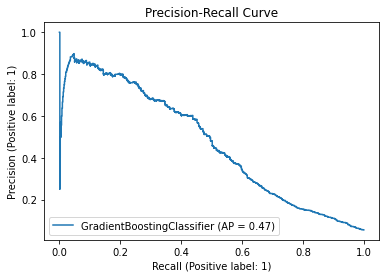

In [81]:
disp = plot_precision_recall_curve(clf, X_test, y_test,)
disp.ax_.set_title('Precision-Recall Curve')

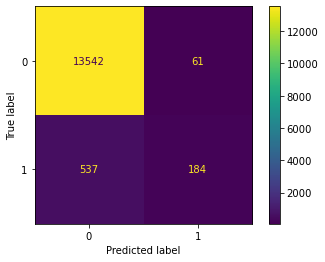

In [90]:
# Confusion matrix
confusion_matrix(y_test, y_hat_G)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

# ROC 

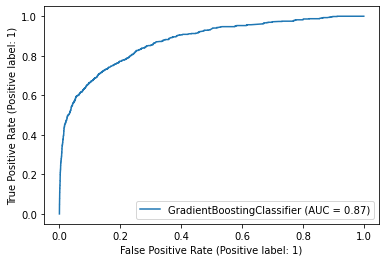

In [91]:
isp = RocCurveDisplay.from_estimator(clf, X_test, y_test)